# DRUG PREDECTION

## inLab ##

### Company Introduction ###

Your client for this project is a pharmaceutical company.

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
Their research and development team have recently developed five types of drugs to fight against chronic throat infection.
They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.
Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

### Current Scenario ###

The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market.
Activity Logs



### Problem Statement ###


The current process suffers from the following problems:

- Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
- Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
- This process is time-consuming and wastage of resources.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

### Your Role ###


- You are given a dataset containing the health report of the people from the test group.
- Your task is to build a multi-class classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  - You need to build the best possible model.

### Project Deliverables ###

**Deliverable**: Drug classification.
**Machine Learning Task:** Multi-class classification
**Target Variable:** Drug
**Win Condition:** N/A (best possible model)

**Evaluation Metric**
The model evaluation will be based on the **Accuracy Score**.

### Data Description ###

The dataset contains all the necessary information about the person’s health like their sex, BP, Age, Cholesterol etc.

We have the **health metrics** of the person which is an essential factor for transcribing the drug to that person without any side effect.

This is the data that we have to predict for future samples.


The dataset is divided into two parts: **Train**, and **Test** sets.

#### Train Set: ####

- The train set contains 160 rows and 7 columns.
- The last column **Drug** is the target variable.

#### Test Set: ####

- The test set contains **40** rows and **6** columns.
- The test set doesn’t contain the **Drug column**.
- It needs to be **predicted** for the **test set**.



In [2]:

import pandas as pd                                             # Importing Pandas for Data Ananlysis and Manipulation                      
from pandas_profiling import ProfileReport                      # for generating profile report    
pd.set_option('display.max_columns', None)                      # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                         # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                  # Removing restriction over chained assignments operations
import numpy as np                                              # For high-level mathmematical functions     
from scipy.stats import randint as sp_randint                   # For initiallizing Randon Integer   
import matplotlib.pyplot as plt                                 # For plotting graphs    
import seaborn as sns                                           # For interactive data vizualization    
%matplotlib inline                                              

import sklearn.metrics                                          # For assessing qualtiy of predections
from sklearn.preprocessing import StandardScaler                # To standardize features by removing the mean and scaling to unit variance.   
from sklearn.model_selection import RandomizedSearchCV          # For random combinations of the hyperparameters ,used to find the best solution for the built model.    
from sklearn.metrics import classification_report               # To generate classification report    
from sklearn.metrics import plot_confusion_matrix               # For plotting confusion matrix, to define the performance of classification algorithm   
#import pydotplus                                               # for generating pydot file 
from IPython.display import Image                               # For generating image using pydot file    

from sklearn.metrics import accuracy_score                      # For calcuating the accuracy of the model    
from sklearn.metrics import precision_score                     # For calculating the precision of the model    
from sklearn.metrics import recall_score                        # For calculating the recall of the model   
from sklearn.metrics import precision_recall_curve              # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                    # For defining performance of classification algorithm     
from sklearn.metrics import f1_score                            # For measuring a model's accuracy on dataset.    
from sklearn.metrics import roc_curve                           # For showing the performance of classification model at all classification thresholds.    
from sklearn.metrics import plot_roc_curve                      # For plotting ROC curve
from sklearn.model_selection import train_test_split            # For splitting the data into training and testing data set     
from sklearn.linear_model import LogisticRegression             # For implementing Logistic regression    
import warnings                                                 # For disabling warings    
warnings.filterwarnings("ignore")

### Data Acquisiton 

We have the **health metrics** of the person which is an essential factor for transcribing the drug to that person without any side effect.

- The **train** set contains 160 rows and 7 columns.
- The **test** set contains **40** rows and **6** columns.
- The last column **Drug** is the target variable, it needs to be predecited for the test dataset


- Loading test and train datasets


In [194]:
#loading train dataset 

train=pd.read_csv("c:\\Users\\roshn\\Downloads\\drug_predection\\drug_train.csv", index_col='Id')
test = pd.read_csv("C:\\Users\\roshn\\Downloads\\drug_predection\\drug_test.csv", index_col='Id')


In [195]:

# displays first five rows, easy to test if the data set has the right type of data
train.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Id,,,,,,
79,32,F,LOW,NORMAL,10.840,drugX
197,52,M,NORMAL,HIGH,9.894,drugX
38,39,F,NORMAL,NORMAL,9.709,drugX
24,33,F,LOW,HIGH,33.486,DrugY
122,34,M,NORMAL,HIGH,22.456,DrugY


In [196]:
test.head()


,Age,Sex,BP,Cholesterol,Na_to_K
Id,,,,,
95,36,M,LOW,NORMAL,11.424
15,16,F,HIGH,NORMAL,15.516
30,18,F,NORMAL,NORMAL,8.750
158,59,F,LOW,HIGH,10.444
128,47,M,LOW,NORMAL,33.542


In [197]:
#dimensions of data set
train.shape
print('Shape of train dataset is',train.shape)
test.shape
print('Shape of train dataset is',test.shape)



Shape of train dataset is (160, 6)
Shape of train dataset is (40, 5)


In [198]:
#checking missing values in train data set
any(train.isna().sum())


False

In [199]:
#checking missing values in test data set
any(test.isna().sum())


False

In [200]:
#checking duplicate values
any(train.duplicated())


False

In [201]:
#checking duplicate values
any(test.duplicated())


False

In [202]:
# Basic Statistical insight on the data set 
train.describe()


,Age,Na_to_K
count,160.000000,160.000000
mean,45.387500,16.194987
std,16.101481,7.254689
min,15.000000,6.269000
25%,32.000000,10.445250
50%,46.000000,14.076500
75%,58.250000,19.480750
max,74.000000,38.247000


In [203]:
test.describe()


,Age,Na_to_K
count,40.000000,40.000000
mean,40.025000,15.642475
std,17.778534,7.173492
min,16.000000,7.261000
25%,24.500000,10.735000
50%,38.000000,12.867500
75%,53.250000,19.100250
max,74.000000,33.542000


### Observations
- The data set has normal distribution.
- There are no missing values in the data set.

In [204]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          160 non-null    int64  
 1   Sex          160 non-null    object 
 2   BP           160 non-null    object 
 3   Cholesterol  160 non-null    object 
 4   Na_to_K      160 non-null    float64
 5   Drug         160 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ KB


In [205]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          40 non-null     int64  
 1   Sex          40 non-null     object 
 2   BP           40 non-null     object 
 3   Cholesterol  40 non-null     object 
 4   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ KB


In [206]:
train.describe(include=[np.object])

,Sex,BP,Cholesterol,Drug
count,160,160,160,160
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,83,62,88,76


In [207]:
test.describe(include=[np.object])

,Sex,BP,Cholesterol
count,40,40,40
unique,2,3,2
top,M,LOW,NORMAL
freq,21,17,25


In [208]:
#getting the names of columns
train.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### Observations
- There are no missing values or duplicate values in the dataset.
- The data has normal distibution. 
- There are 3 numeric features and 4 categorical features. 

### Data Preprocessing 


Pandas-profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is handy yet a little basic for exploratory data analysis. pandas-profiling extends pandas DataFrame with df.profile_report(), which automatically generates a standardized univariate and multivariate report for data understanding.



In [209]:
profile = ProfileReport(df=train)
profile.to_file(output_file='Drug_predection train dataset report.html')
print('Done!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Done!


In [210]:
import sweetviz as sv
sweet_report = sv.analyze(train)
sweet_report.show_html('Drug_Prediction_train dataset report.html')


                                             |                                             | [  0%]   00:00 ->…

Report Drug_Prediction_train dataset report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [211]:

import dtale
import pandas as pd
d = dtale.show(train)
d.open_browser()


### Observations 

- There is no need for data post profiling as nothing has been changed 
- It confirms that the data does not have any missing or duplicate values.



### Exploratory Data Analysis
EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods.

EDA is used for seeing what the data can tell us before the modeling task.

Exploratory data analysis is generally cross-classified in two ways.

First, each method is either non-graphical or graphical.
And second, each method is either univariate or multivariate (usually just bivariate).

**Univariate Analysis**

Univariate analysis is the simplest form of data analysis, where the data being analyzed consists of only one variable.
Since it’s a single variable, it doesn’t deal with causes or relationships.
The main purpose of the univariate analysis is to describe the data and find patterns that exist within it.
Visualizations used for performing univariate analysis:
- Line Chart
- Histogram

**Multivariate analysis**

Multivariate data analysis refers to any statistical technique used to analyze data that arises from more than one variable.
This model’s more realistic applications, where each situation, product, or decision involves more than a single variable.
Visualizations used for performing multivariate analysis:
- Scatter Plot
- Heatmap

The total number of drugs are DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64


<AxesSubplot:xlabel='Drug', ylabel='count'>

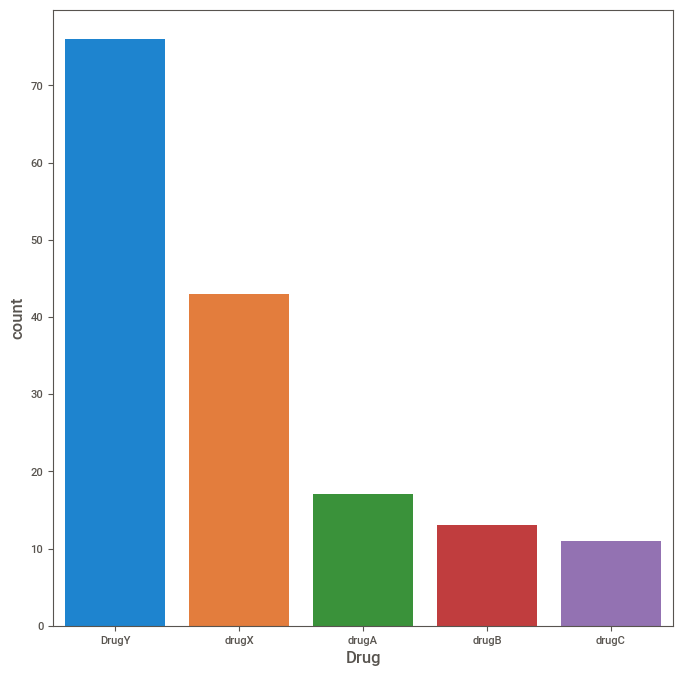

In [213]:
#We are going to check the breakdown of drugs.

train['Drug'].value_counts()
print("The total number of drugs are",train['Drug'].value_counts())

%matplotlib inline   

plt.figure(figsize=(8,8))
sns.countplot(x='Drug',data=train,order=train['Drug'].value_counts().index)



<AxesSubplot:xlabel='Age', ylabel='count'>

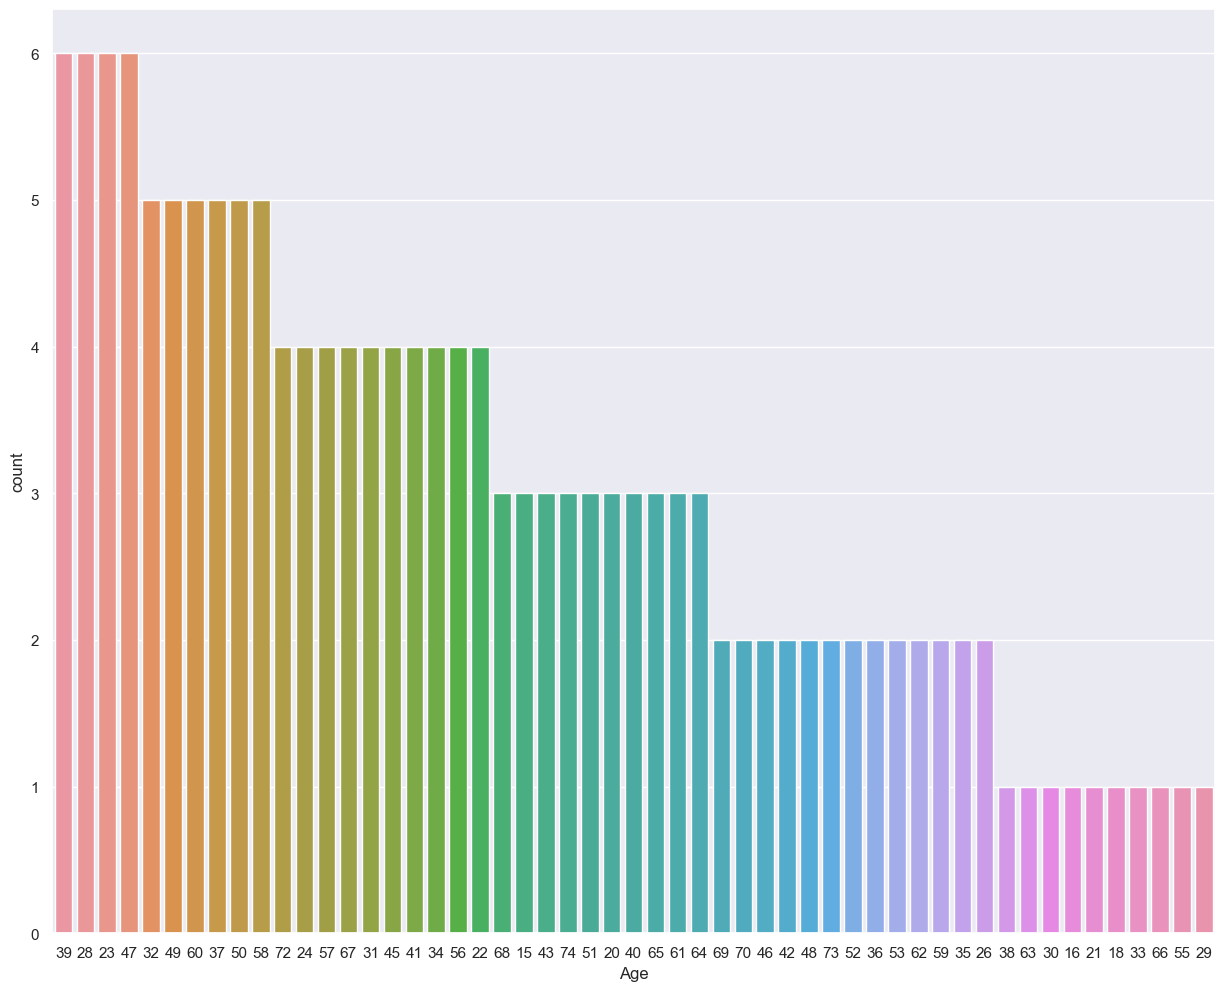

In [340]:
# We are going to check the age feature

train['Age'].value_counts()
plt.figure(figsize=(15,12))
sns.countplot(x='Age',data=train,order=train['Age'].value_counts().index)

Number of people as per the gender are M    83
F    77
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

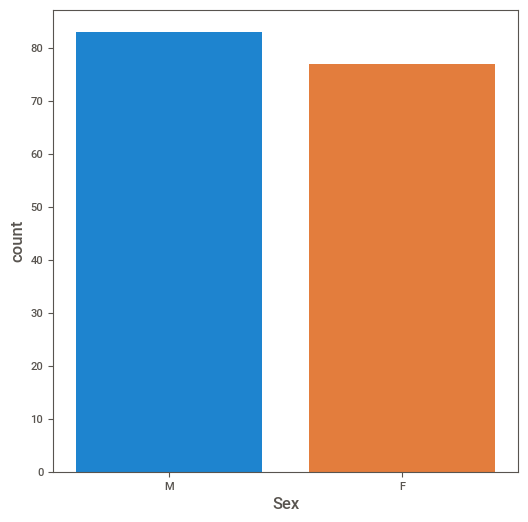

In [215]:
# We are now going to check the Sex feature
train['Sex'].value_counts()
print('Number of people as per the gender are',train['Sex'].value_counts())
plt.figure(figsize=(6,6))
sns.countplot(x='Sex',data=train,order=train['Sex'].value_counts().index)

Number of people as per the respective Blood pressure are: HIGH      62
NORMAL    51
LOW       47
Name: BP, dtype: int64


<AxesSubplot:xlabel='BP', ylabel='count'>

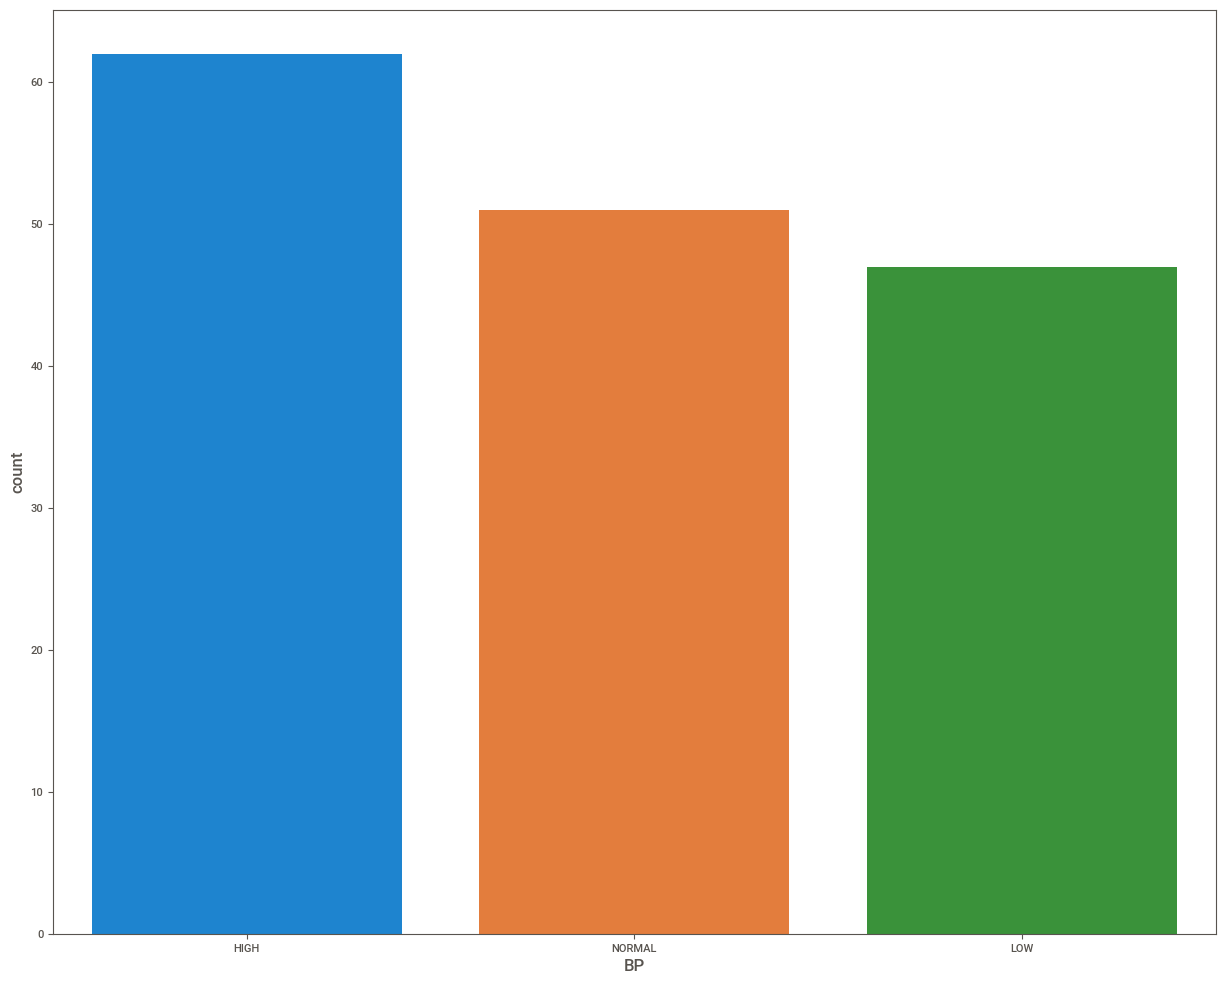

In [216]:
# Now we are going to analyze the BP feature


train['BP'].value_counts()
print("Number of people as per the respective Blood pressure are:",train['BP'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='BP',data=train,order=train['BP'].value_counts().index)

In [342]:
# Now we are going to analyze the Na_to_K feature
train['Na_to_K'].value_counts()
#plt.figure(figsize=(25,25))
#sns.countplot(x='Na_to_K',data=train,order=train['Na_to_K'].value_counts().index)


12.006    2
10.840    1
22.818    1
25.893    1
19.796    1
13.934    1
14.133    1
11.037    1
7.490     1
15.156    1
11.326    1
10.446    1
13.884    1
17.211    1
15.171    1
20.942    1
18.703    1
10.017    1
32.922    1
15.969    1
25.786    1
19.221    1
9.084     1
10.537    1
11.227    1
18.809    1
15.036    1
37.188    1
12.307    1
7.761     1
23.003    1
18.457    1
10.291    1
15.015    1
16.724    1
12.260    1
11.343    1
7.798     1
8.968     1
13.972    1
10.605    1
18.348    1
17.206    1
20.489    1
11.009    1
8.966     1
16.725    1
9.514     1
15.478    1
17.069    1
11.349    1
27.183    1
19.128    1
34.997    1
19.675    1
11.953    1
12.703    1
29.450    1
15.891    1
8.151     1
13.093    1
21.036    1
31.686    1
14.216    1
15.490    1
8.370     1
10.189    1
20.013    1
19.416    1
10.091    1
23.091    1
6.769     1
25.917    1
27.826    1
10.443    1
16.310    1
7.477     1
13.938    1
22.963    1
9.677     1
22.697    1
9.894     1
10.977    1
9.56

Number of people as per the respective Cholesterol are: HIGH      88
NORMAL    72
Name: Cholesterol, dtype: int64


<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

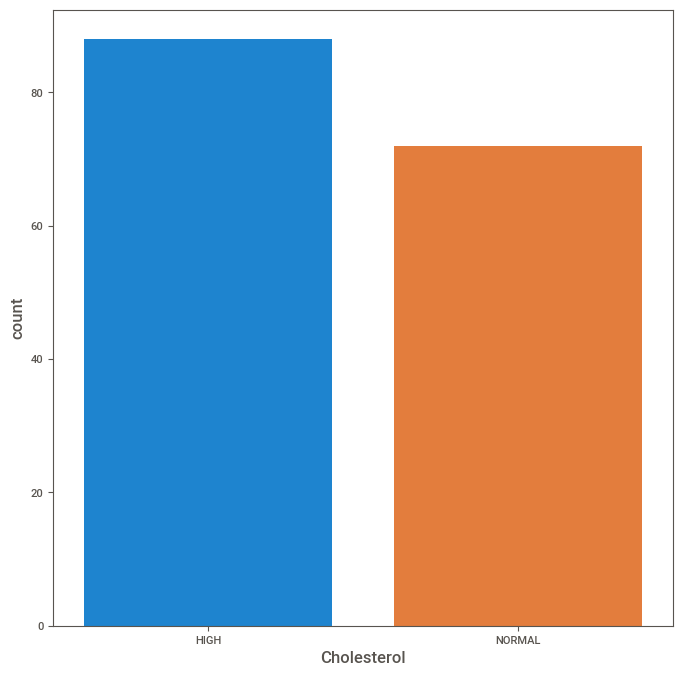

In [218]:
# Now we are going to analyze the Cholesterol feature
train['Cholesterol'].value_counts()
print("Number of people as per the respective Cholesterol are:",train['Cholesterol'].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x='Cholesterol',data=train,order=train['Cholesterol'].value_counts().index)

As we have analyzed each features of the data set, now we are going to analyze the relationship between the features.

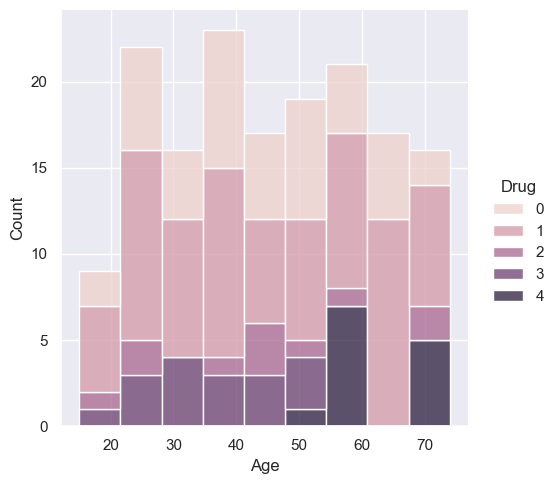

In [334]:
#We are checking the relationship between drugs taken with respect to Age

#sns.factorplot('Drug', data=train, hue='Age', kind='count')

sns.displot(data=train, x="Age", hue="Drug", multiple="stack")


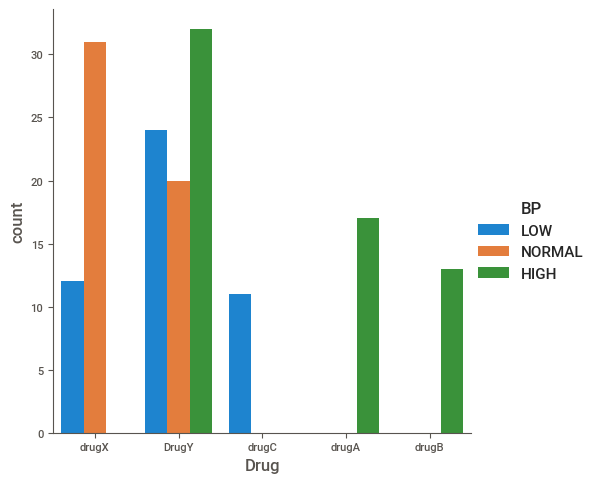

In [221]:
#We are checking the relationship between drugs taken with respect to Bloodpressure

sns.factorplot('Drug', data=train, hue='BP', kind='count')


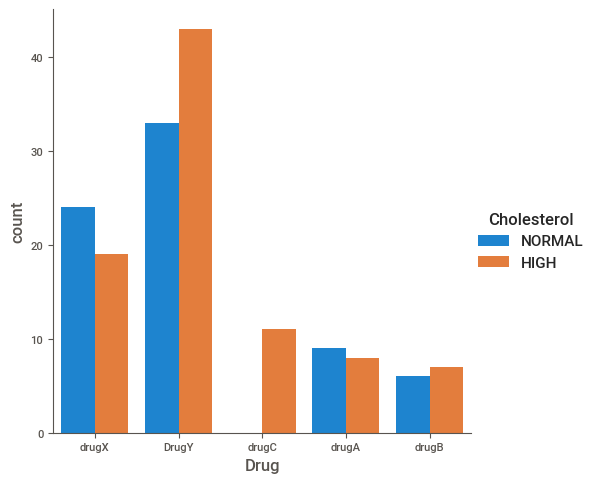

In [223]:
#We are checking the relationship between drugs taken with respect to Cholesterol

sns.factorplot('Drug', data=train, hue='Cholesterol', kind='count')

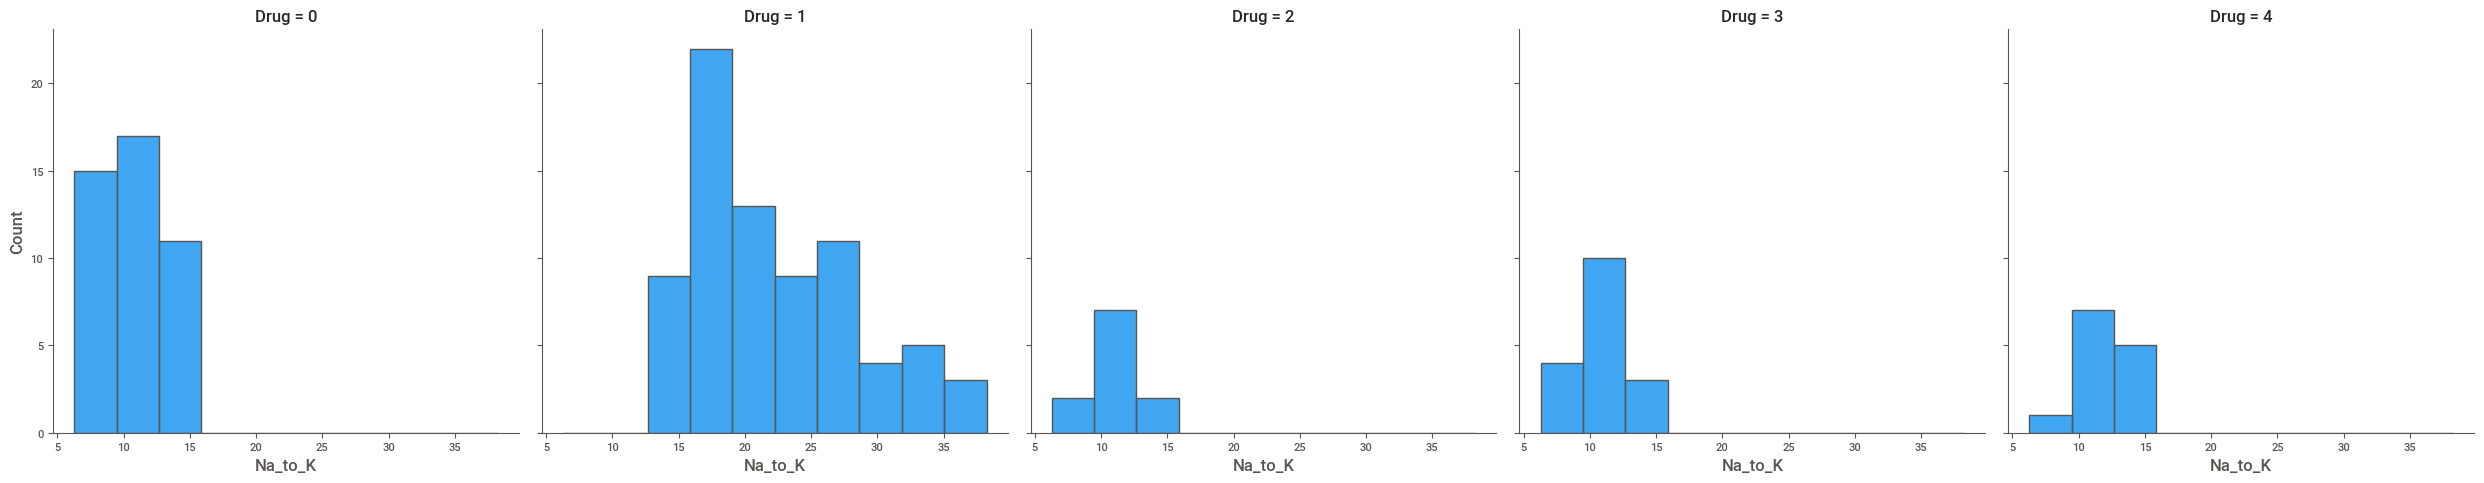

In [323]:
#We are checking the relationship between drugs taken with respect to Na_to_K

sns.displot(data=train, x="Na_to_K", col="Drug", kde=True)


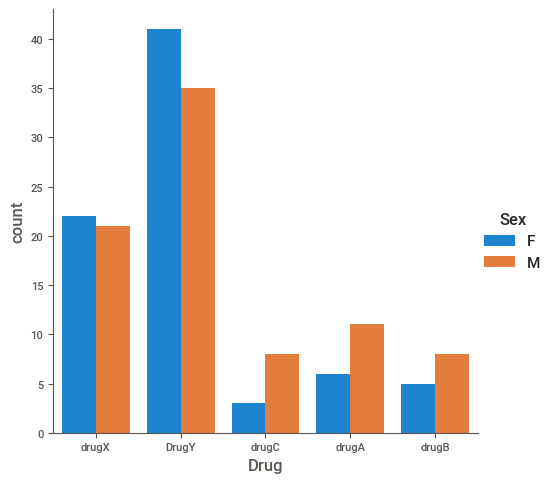

In [225]:
#We are checking the relationship between drugs taken with respect to Sex

sns.factorplot('Drug', data=train, hue='Sex', kind='count')

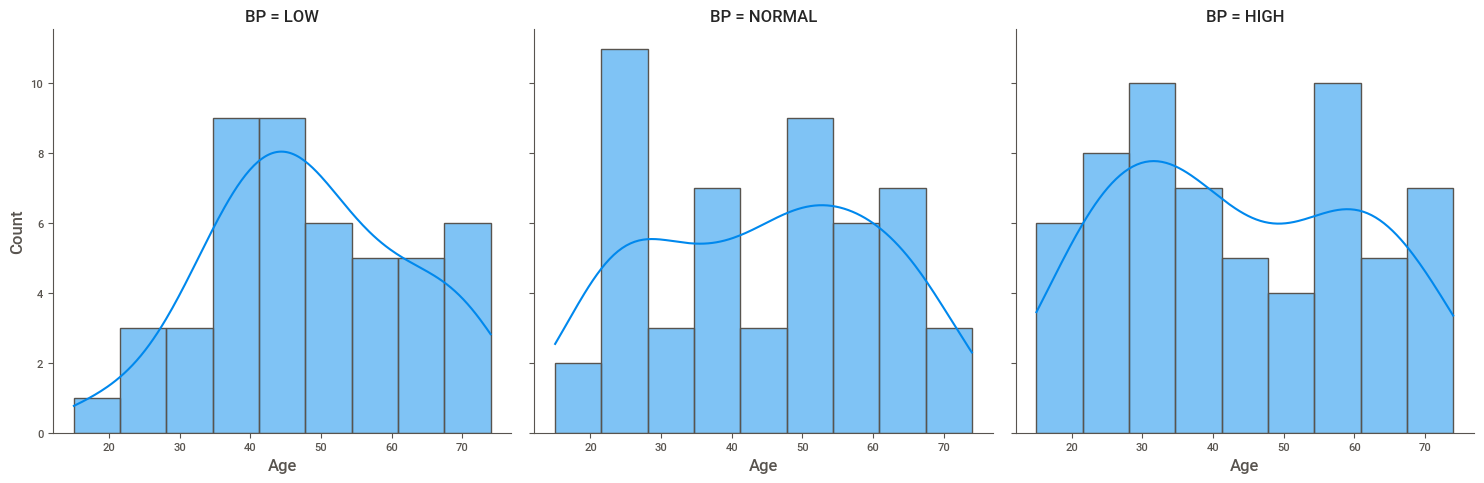

In [321]:
# We are analyzing the BP feature with respect to Age

sns.displot(data=train, x="Age", col="BP", kde=True)


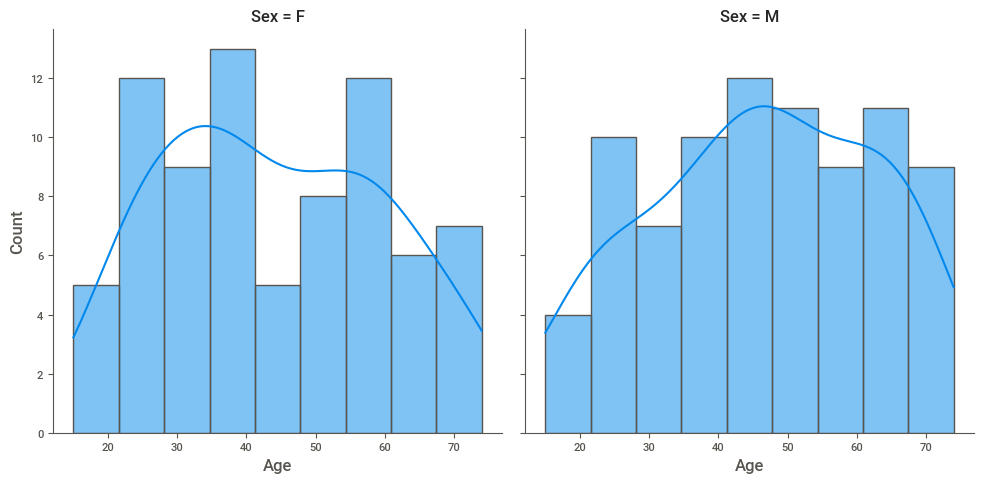

In [319]:
# We are analyzing the feature of Sex with respect to Age

sns.displot(data=train, x="Age", col="Sex", kde=True)


<AxesSubplot:xlabel='Cholesterol'>

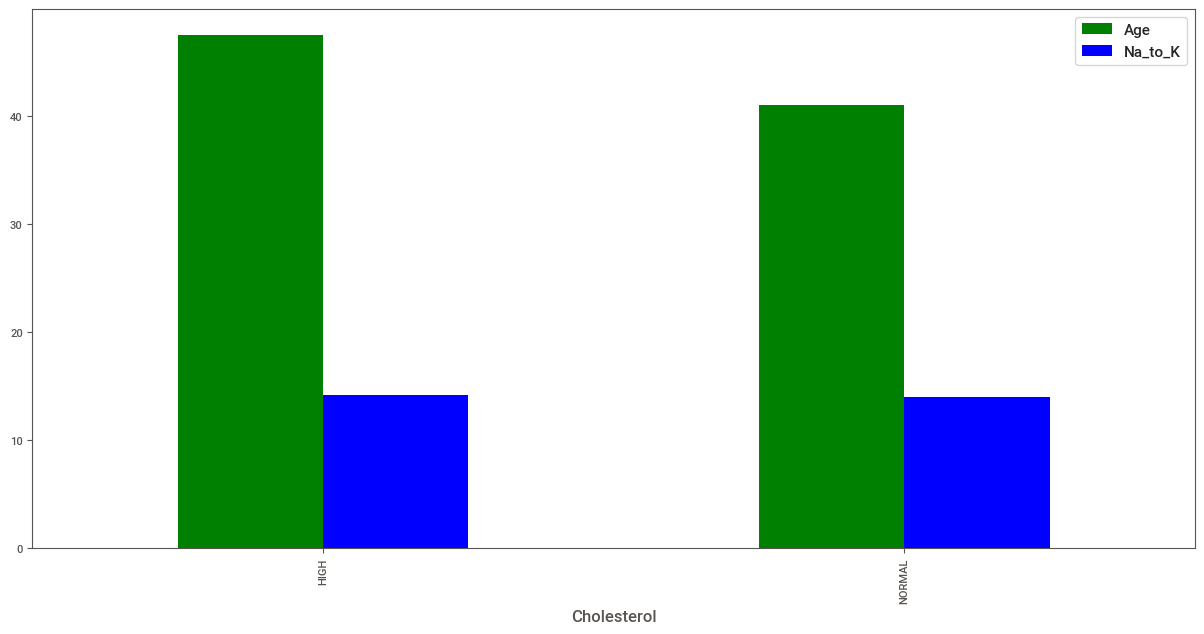

In [228]:
# We are analyzing the feature of cholestrol with respect to Age and Na_to_K
train.groupby(['Cholesterol'])[['Age','Na_to_K']].median().plot(kind='bar', figsize=(15, 7), color=['green','blue'])


<AxesSubplot:xlabel='BP'>

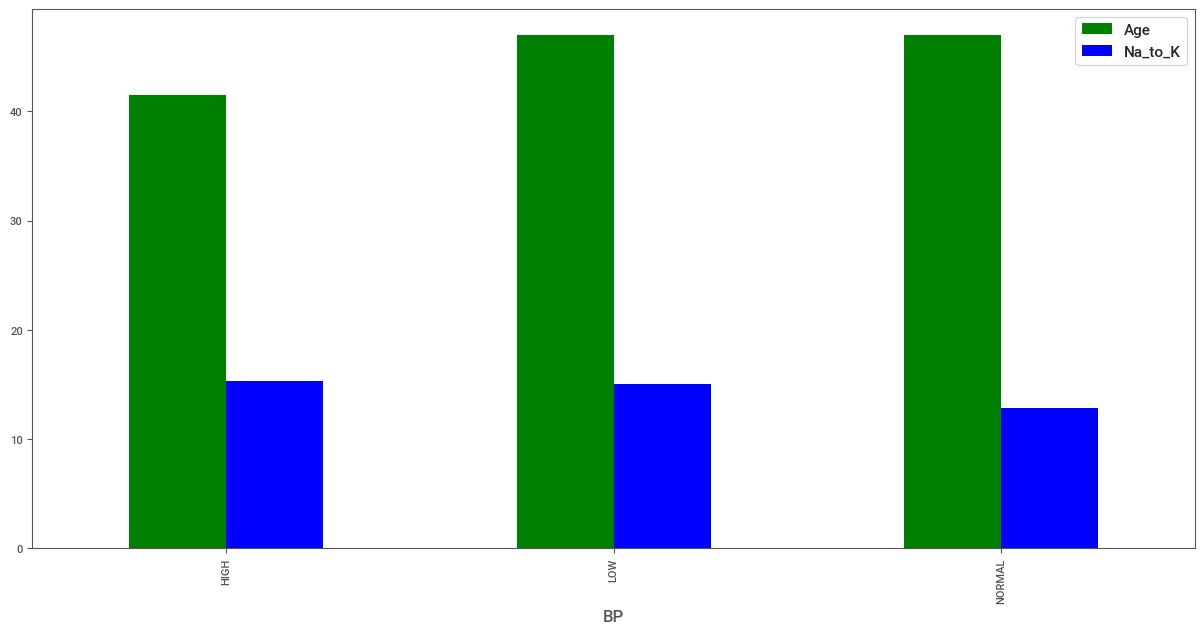

In [229]:
# We are analyzing the feature of BP with respect to Age and Na_to_K

train.groupby(['BP'])[['Age','Na_to_K']].median().plot(kind='bar', figsize=(15, 7), color=['green','blue'])


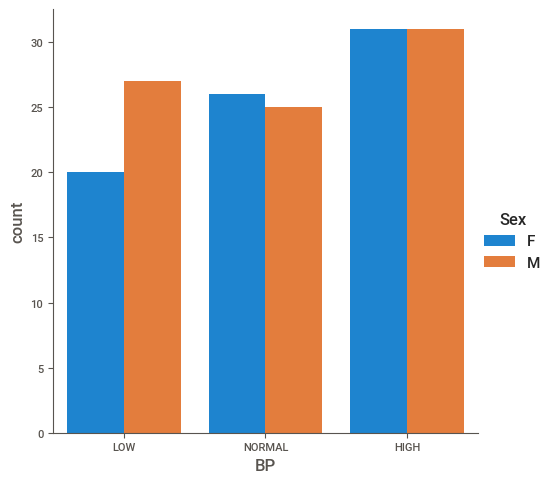

In [230]:
# We are checking the relationship between bloodpressure  with respect to Gender

sns.factorplot('BP', data=train, hue='Sex', kind='count')


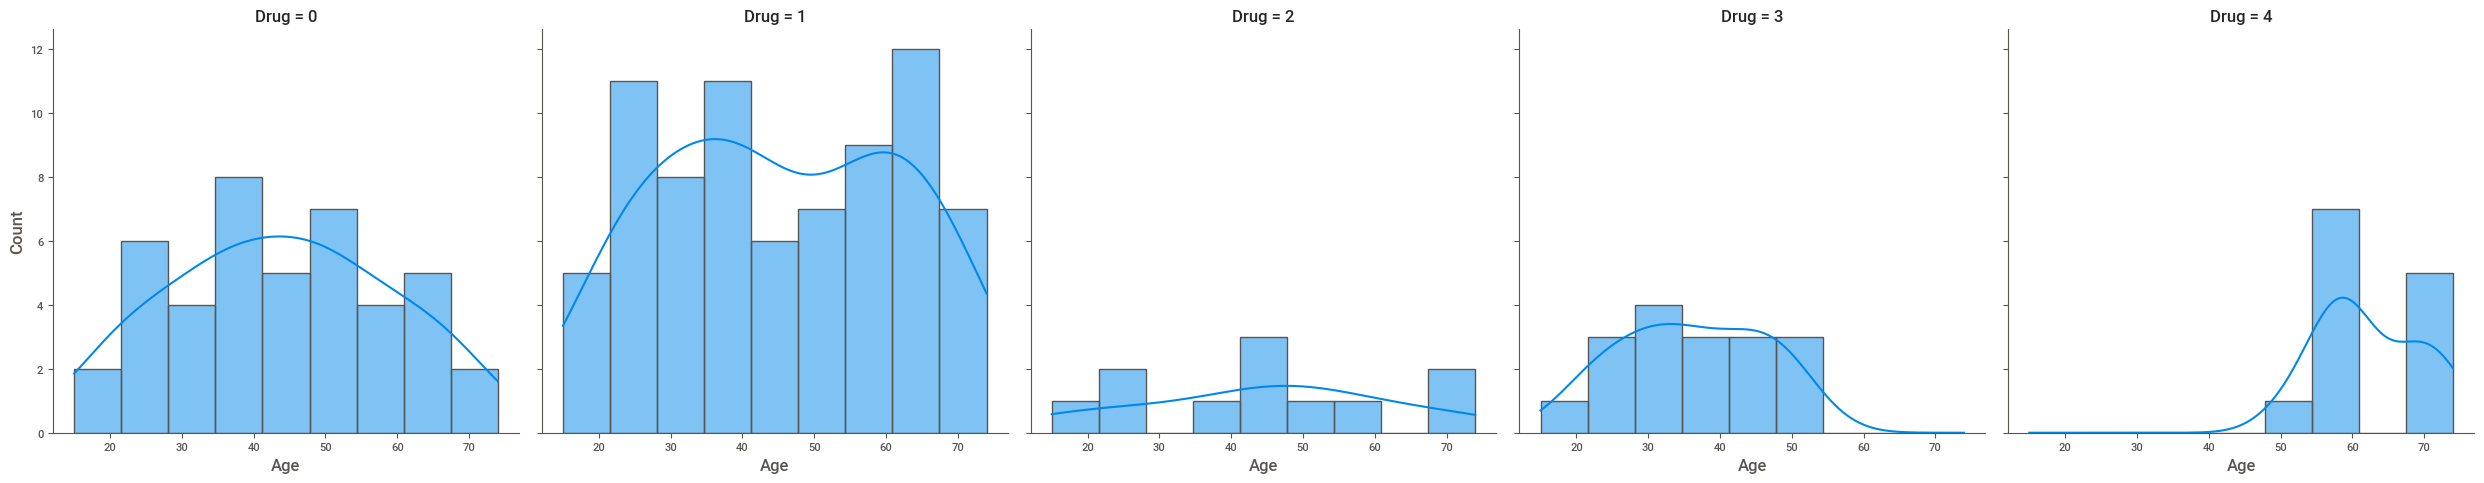

In [317]:
# Analyzing the drug types with repsect to Age feature
sns.displot(data=train, x="Age", col="Drug", kde=True )


<Figure size 1000x800 with 0 Axes>

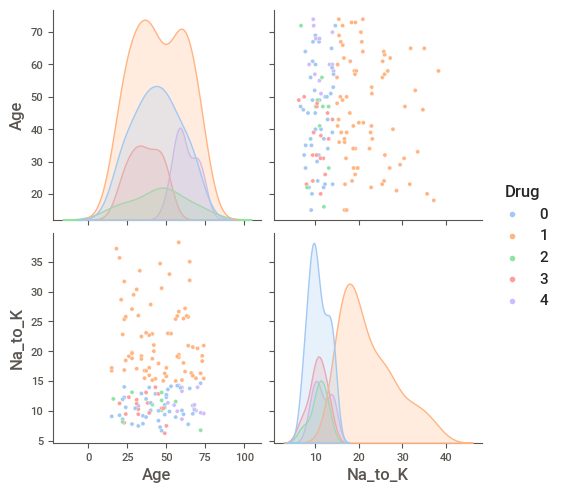

In [312]:
# Analyzing Age, Na_to_K , Drug features and the relationship among them.
plt.figure(figsize=(10,8))
sns.pairplot(train[['Age', 'Na_to_K', 'Drug']],palette='pastel',diag_kind='kde',hue="Drug")

Correlation Matrix is:               Age   Na_to_K      Drug
Age      1.000000 -0.042363  0.134933
Na_to_K -0.042363  1.000000 -0.140634
Drug     0.134933 -0.140634  1.000000


Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

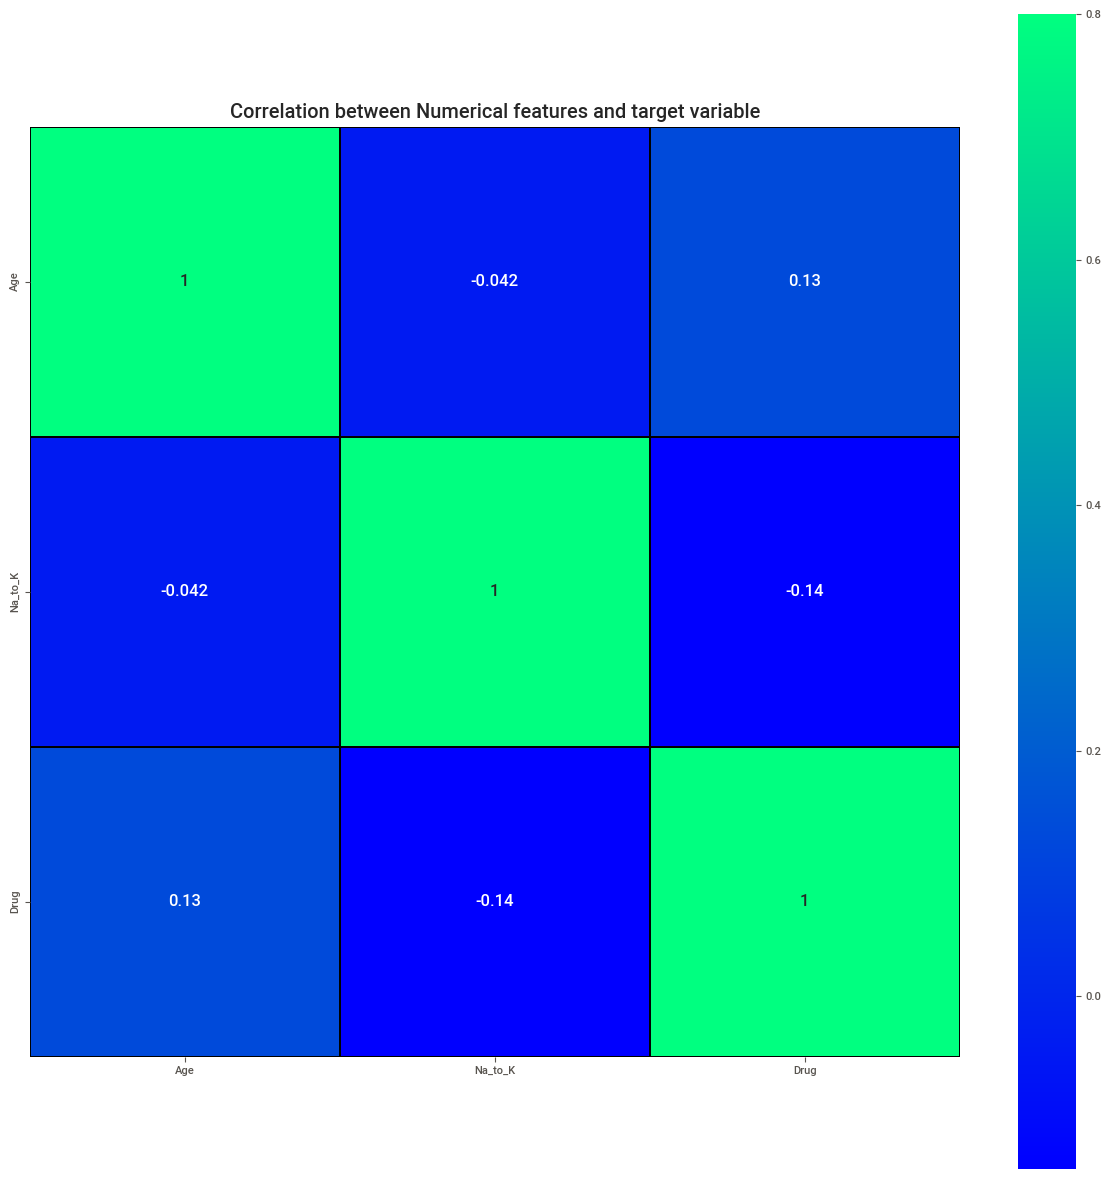

In [310]:

#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = train.corr(method='pearson') #using pearson correlation coeffiecnt as we have raw data value
print('Correlation Matrix is:', corr)
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='winter',linecolor ='black') #plotting the heatmap for correlation

plt.title('Correlation between Numerical features and target variable')

In [235]:

#Covariance indicates the relationship of two variables whenever one variable changes.
#Covariance can vary between -∞ and +∞
train.cov() #for checking the covarince between the features

,Age,Na_to_K
Age,259.257704,-4.948461
Na_to_K,-4.948461,52.630515


### Observations

- Drug is highly correlated with BP and Na_to_K.

### Data Encoding

The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

**Dummy Encoding**

Dummy encoding also uses dummy (binary) variables. Instead of creating a number of dummy variables that is equal to the number of categories (k) in the variable, dummy encoding uses k-1 dummy variables.


In [132]:
pip install category_encoders



     ---------------------------------------- 71.3/71.3 kB 4.1 MB/s eta 0:00:00


In [236]:
# replacing the drug names into integer
train.replace(to_replace={'drugA': 3, 'drugB': 4, 'drugC': 2, 'drugX': 0, 'DrugY': 1}, inplace=True)


In [237]:
train.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Id,,,,,,
79,32,F,LOW,NORMAL,10.840,0
197,52,M,NORMAL,HIGH,9.894,0
38,39,F,NORMAL,NORMAL,9.709,0
24,33,F,LOW,HIGH,33.486,1
122,34,M,NORMAL,HIGH,22.456,1


In [238]:
train['Drug'].value_counts()


1    76
0    43
3    17
4    13
2    11
Name: Drug, dtype: int64

In [239]:
#Convert categorical variable into dummy variables.

train_encoded = pd.get_dummies(train, columns=['Sex','BP', 'Cholesterol'], drop_first=True)


In [240]:
train_encoded.head()


,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
Id,,,,,,,
79,32,10.840,0,0,1,0,1
197,52,9.894,0,1,0,1,0
38,39,9.709,0,0,0,1,1
24,33,33.486,1,0,1,0,0
122,34,22.456,1,1,0,1,0


In [244]:
train_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 160 non-null    int64  
 1   Na_to_K             160 non-null    float64
 2   Drug                160 non-null    int64  
 3   Sex_M               160 non-null    uint8  
 4   BP_LOW              160 non-null    uint8  
 5   BP_NORMAL           160 non-null    uint8  
 6   Cholesterol_NORMAL  160 non-null    uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 9.7 KB


In [242]:
train_encoded.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
Id,,,,,,,
79,32,10.840,0,0,1,0,1
197,52,9.894,0,1,0,1,0
38,39,9.709,0,0,0,1,1
24,33,33.486,1,0,1,0,0
122,34,22.456,1,1,0,1,0


In [245]:
y= train_encoded['Drug']


In [246]:
train_encoded.drop(columns=['Drug'],inplace=True)


In [247]:
train_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 160 non-null    int64  
 1   Na_to_K             160 non-null    float64
 2   Sex_M               160 non-null    uint8  
 3   BP_LOW              160 non-null    uint8  
 4   BP_NORMAL           160 non-null    uint8  
 5   Cholesterol_NORMAL  160 non-null    uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 8.4 KB


In [248]:
test_encoded = pd.get_dummies(test, columns=['Sex','BP', 'Cholesterol'], drop_first=True)


In [249]:
test_encoded.head(10)


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
Id,,,,,,
95,36,11.424,1,1,0,1
15,16,15.516,0,0,0,1
30,18,8.750,0,0,1,1
158,59,10.444,0,1,0,0
128,47,33.542,1,1,0,1
115,51,18.295,1,0,0,0
69,18,24.276,0,0,0,1
170,28,12.879,0,0,1,0
174,42,12.766,1,0,0,1


In [250]:
test_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 40 non-null     int64  
 1   Na_to_K             40 non-null     float64
 2   Sex_M               40 non-null     uint8  
 3   BP_LOW              40 non-null     uint8  
 4   BP_NORMAL           40 non-null     uint8  
 5   Cholesterol_NORMAL  40 non-null     uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 1.1 KB


In [251]:
test_encoded.shape

(40, 6)

### Data Preparation

Now, we will split the data into train and test sets using validation, we will be using test data as 25%. We will be using hold-out validation technique.

**Hold-Out Validation**

In hold-out validation, data set is partitioned, such that – maximum data belongs to training set and remaining data belongs to test set.



In [305]:
# Splitting data into train and test sets with using  Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(train_encoded, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of train and test data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
X_train.columns
X_train.head()

X_train shape:  (120, 6)
y_train shape:  (120,)
X_test shape:  (40, 6)
y_test shape:  (40,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 153 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 120 non-null    int64  
 1   Na_to_K             120 non-null    float64
 2   Sex_M               120 non-null    uint8  
 3   BP_LOW              120 non-null    uint8  
 4   BP_NORMAL           120 non-null    uint8  
 5   Cholesterol_NORMAL  120 non-null    uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 3.3 KB


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
Id,,,,,,
153,72,14.642,0,1,0,1
52,62,27.183,1,1,0,1
146,37,12.006,0,1,0,1
12,43,15.376,1,1,0,0
139,69,10.065,0,0,1,0


### Data Scaling

This refers to transforming data so that it fits within a specific scale.

I've used **RobustScaler()** remove the outliers.

In [253]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_rbs = RobustScaler()    #Scale features using statistics that are robust to outliers.


X_train_rbs = scaler_rbs.fit_transform(X_train) #Fitting and transforming Robust scaler to X_train
X_test_rbs = scaler_rbs.transform(X_test)  #Scaling and Transforming X_test data

**Logistic Regression**

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

**Accuracy**

Accuracy is the number of correctly predicted data points out of all the data points.

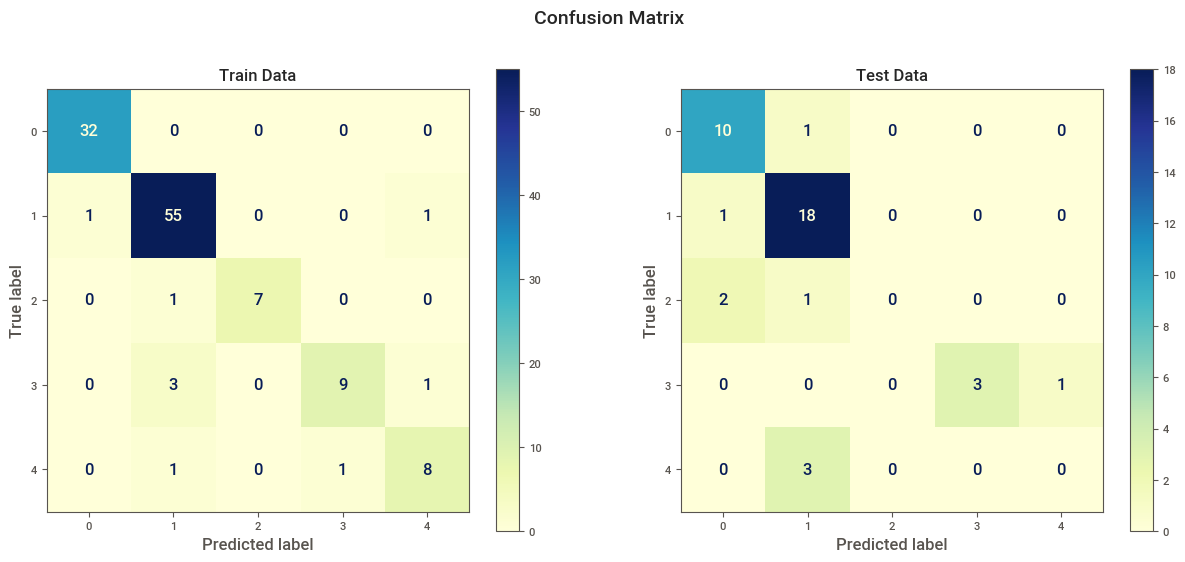

In [303]:
#  Logistic Regression
logreg = LogisticRegression() # Applying logistic regression
logreg.fit(X_train,y_train) # Fit the model according to the given training data.

# Predict train and test labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# confusion maxtrix 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=14)
plt.show()

In [302]:
print('Accuracy score for test data using logistic regression is:', accuracy_score(y_test,y_test_pred_count))


Accuracy score for test data using logistic regression is: 0.775


In [301]:
# Generating classification report for Logistic Regression 
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Train Data Report          ')
print(train_report)
print('                    Test  Data Report           ')
print(test_report)

                    Train Data Report          
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.92      0.96      0.94        57
           2       1.00      0.88      0.93         8
           3       0.90      0.69      0.78        13
           4       0.80      0.80      0.80        10

    accuracy                           0.93       120
   macro avg       0.92      0.87      0.89       120
weighted avg       0.92      0.93      0.92       120

                    Test  Data Report           
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.78      0.95      0.86        19
           2       0.00      0.00      0.00         3
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         3

    accuracy                           0.78        40
   macro avg       0.51      0.52 

**Decision Tree Classifier**

- It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

- In a Decision tree, there are two nodes, which are the **Decision Node** and **Leaf Node**. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

- The decisions or the test are performed on the basis of features of the given dataset.

- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

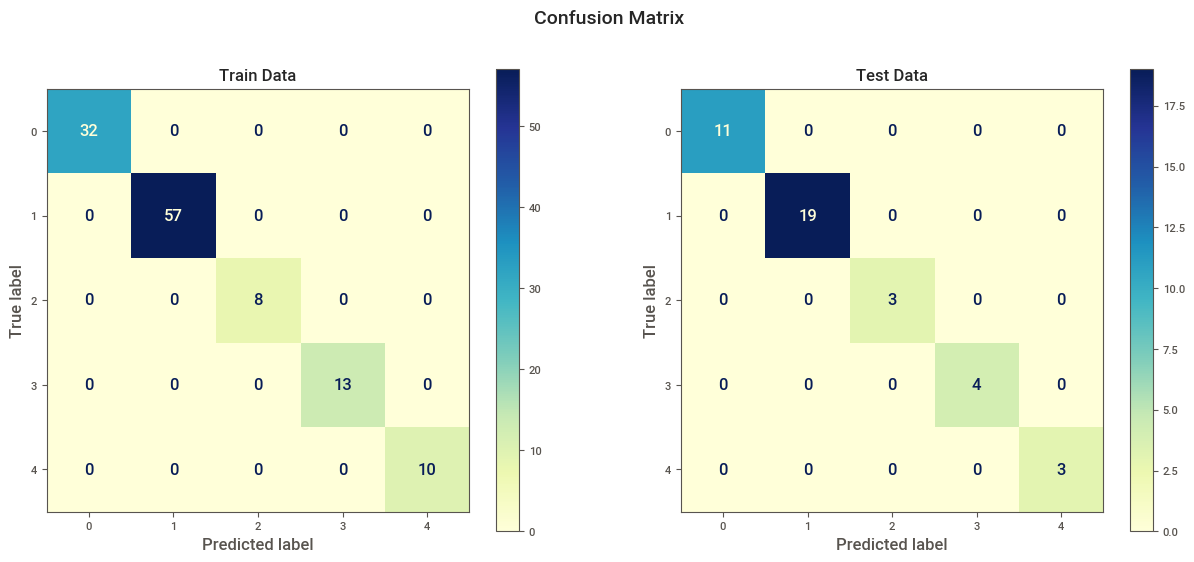

In [300]:
from sklearn.tree import DecisionTreeClassifier

# decision tree classifier
dtc = DecisionTreeClassifier(random_state=1, class_weight='balanced') # Using random  to chose best random split and class weight as balanced to replicating the smaller class until you have as many samples as in the larger one, but in an implicit way.
dtc.fit(X_train, y_train) # Build a decision tree classifier from the training set (X, y).

# Predict train and test labels
y_train_pred_count_dtc = dtc.predict(X_train)
y_test_pred_count_dtc = dtc.predict(X_test)

#  confusion matrix 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))
plot_confusion_matrix(estimator=dtc, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtc, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=14)
plt.show()

In [299]:
print('Accuracy score for test data using Decision Tree classifier is:', accuracy_score(y_test,y_test_pred_count_dtc))


Accuracy score for test data using Decision Tree classifier is: 1.0


In [296]:
#Generating Classification report for Decision tree classifier

train_report_dtc = classification_report(y_train, y_train_pred_count_dtc)
test_report_dtc = classification_report(y_test, y_test_pred_count_dtc)

print('                    Train Data Report          ')
print(train_report_dtc)
print('                    Test Data Report           ')
print(test_report_dtc)

                    Train Data Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        10

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

                    Test Data Report           
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00  

**Random Forest Classifier**

- Random Forest is a classifier that contains a number of **decision trees** on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
- The greater number of trees in the forest leads to **higher accuracy** and prevents the problem of overfitting.
- There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
- The predictions from each tree must have very low correlations.


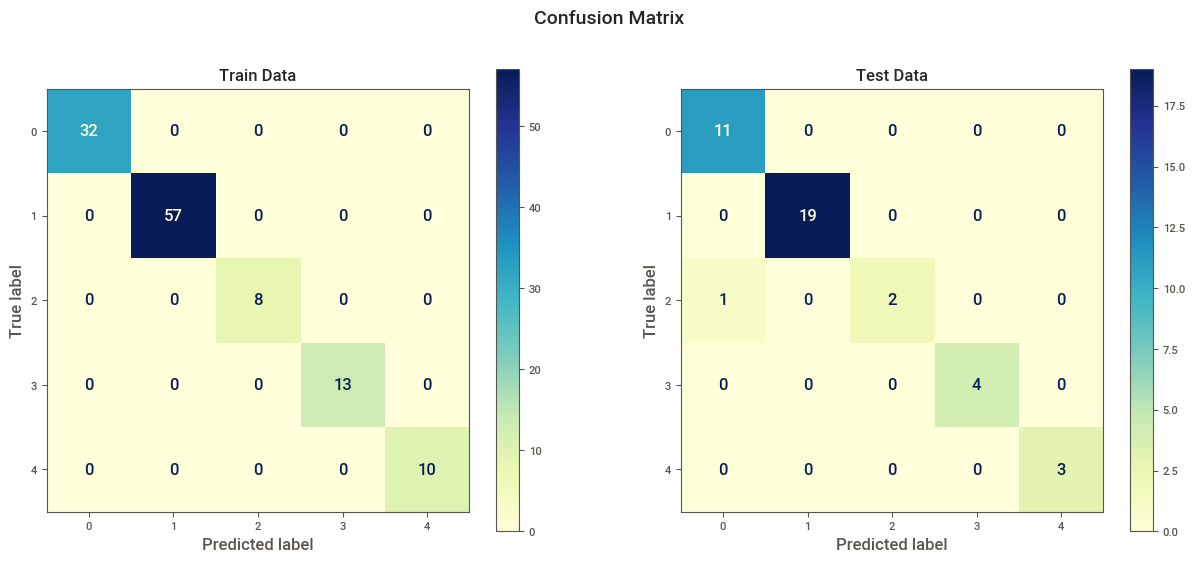

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Random forest classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train) # Build a forest of trees from the training set (X, y).


# Predicting train and test labels
y_train_pred_count_clf = clf.predict(X_train) # Predict class for X train.

y_test_pred_count_clf = clf.predict(X_test) # Predict class for X test.

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))
plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=14)
plt.show()


In [292]:
print('Accuracy score for test data using Random Forest Classifier is:', accuracy_score(y_test,y_test_pred_count_clf))


Accuracy score for test data using Random Forest Classifier is: 0.975


In [345]:
# Generating classification report of Random Forest classifier
train_report_clf = classification_report(y_train, y_train_pred_count_clf)
test_report_clf = classification_report(y_test, y_test_pred_count_clf)
print('                    Train Data Report          ')
print(train_report_clf)
print('                    Test  Data Report           ')
print(test_report_clf)

                    Train Data Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        10

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

                    Test  Data Report           
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00        19
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.98      0.93 

**Naïve Bayes Classifier**

- Naïve Bayes Classifier is based on **Bayes theorem** and used for solving classification problems.
- It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
-  It depends on the conditional probability.
- It can be used for Binary as well as Multi-class Classifications.


In [ ]:
# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB     # Importing Naive Bayes classifier
naive = GaussianNB()
naive.fit(X_train, y_train) #Fit Gaussian Naive Bayes according to X, y.

# Predicting train and test labels
y_train_pred_count_naive = naive.predict(X_train) 
y_test_pred_count_naive = naive.predict(X_test)


# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))
plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=14)
plt.show()

In [291]:
print('Accuracy score for test data using Naive Bayes is:', accuracy_score(y_test,y_test_pred_count_naive))


Accuracy score for test data using Naive Bayes is: 0.875


In [343]:
# Generating classification report 
train_report_clf = classification_report(y_train, y_train_pred_count_naive)
test_report_clf = classification_report(y_test, y_test_pred_count_naive)
print('                    Train Data Report          ')
print(train_report_clf)
print('                    Test  Data Report           ')
print(test_report_clf)

                    Train Data Report          
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.93      0.65      0.76        57
           2       0.53      1.00      0.70         8
           3       0.57      1.00      0.72        13
           4       0.77      1.00      0.87        10

    accuracy                           0.81       120
   macro avg       0.76      0.91      0.80       120
weighted avg       0.87      0.81      0.81       120

                    Test  Data Report           
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.94      0.89      0.92        19
           2       0.00      0.00      0.00         3
           3       0.67      1.00      0.80         4
           4       1.00      1.00      1.00         3

    accuracy                           0.88        40
   macro avg       0.69      0.78 

In [290]:
import sys
np.set_printoptions(threshold=sys.maxsize) #Set printing options.
y_test_pred = logreg.predict(test_encoded) #predecting using logistic regression
y_test_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 3, 0, 1, 0, 1, 1, 4, 1, 4, 0, 0, 1, 4, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 3, 1, 0, 1, 1, 3], dtype=int64)

In [289]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_dtc = dtc.predict(test_encoded) #predecting using Decision tree classifier
y_test_pred_dtc

array([0, 1, 0, 2, 1, 1, 1, 0, 3, 0, 3, 0, 1, 3, 4, 1, 4, 0, 2, 1, 4, 0,
       0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 3, 1, 0, 3, 1, 3], dtype=int64)

In [288]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_clf = clf.predict(test_encoded) #predecting using Random Forest classifier
y_test_pred_clf

array([0, 1, 0, 2, 1, 1, 1, 0, 3, 0, 3, 0, 1, 3, 4, 1, 4, 0, 0, 1, 4, 0,
       0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 3, 1, 0, 3, 1, 3], dtype=int64)

In [287]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_naive = naive.predict(test_encoded) #predecting using NaiveBayes classifier
y_test_pred_naive

array([0, 3, 0, 0, 1, 3, 1, 0, 3, 0, 3, 0, 2, 3, 4, 1, 4, 0, 0, 1, 4, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 3, 3], dtype=int64)

In [283]:
# generating output csv for logistic regression
output = pd.DataFrame({'Id': test_encoded.index,'label': y_test_pred})
output.to_csv('drug-prediction-logreg.csv', index=False, header=False)

In [284]:
# generating output csv for decisiontree classifier

output = pd.DataFrame({'Id': test_encoded.index,'label': y_test_pred_dtc})
output.to_csv('drug-prediction-decisiontree.csv', index=False, header=False)

In [285]:
# generating output csv for Randomforest classifier

output = pd.DataFrame({'Id': test_encoded.index,'label': y_test_pred_clf})
output.to_csv('drug-prediction-Randomforest.csv', index=False, header=False)

In [286]:
#generating output csv for NaiveBayes classifier
output = pd.DataFrame({'Id': test_encoded.index,'label': y_test_pred_naive})
output.to_csv('drug-prediction-naivebayes.csv', index=False, header=False)

### Observation

- Accuracy Score was used for model evaluation and prediction
- Accuracy score of models used :

| Model Name | Accuracy|
|------------|-------------|
| Logistic regression | 0.775 |
| Decision Tree | 1.0 |
| Random Forest Classifier | 0.975 |
| Naive Bayes Classifier| 0.875 |